In [1]:
from pyiron_atomistics import Project
import sys
sys.path.append("/home/amin/projects/mul/wmaee/wmaee/codes/pyiron")
from pyiron_GRACE_job import Grace
from tensorpotential.calculator import grace_fm
from tensorpotential.calculator import TPCalculator
import matplotlib.pyplot as plt

/home/amin/anaconda3/envs/pyiron/lib/python3.11/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
2025-09-12 11:49:41.540757: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-12 11:49:41.541810: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-12 11:49:41.546697: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-12 11:49:41.558547: E external/local_xla/xla/stream_executo

In [2]:
pr = Project("grace_test")
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,Fe8,Fe_static,/Fe_static,None,/home/amin/projects/mul/wmaee/wmaee/codes/pyiron/tests/grace_test/,2025-09-12 11:12:15.880776,2025-09-12 11:12:29.743192,13.0,pyiron@Nero#1,Grace,0.1,None,None
1,2,finished,Fe7Mo,large_Fe_relax,/large_Fe_relax,None,/home/amin/projects/mul/wmaee/wmaee/codes/pyiron/tests/grace_test/,2025-09-12 11:16:12.716929,2025-09-12 11:16:28.256037,15.0,pyiron@Nero#1,Grace,0.1,None,None
2,3,finished,Fe127Mo,large_Fe_relax_omat,/large_Fe_relax_omat,None,/home/amin/projects/mul/wmaee/wmaee/codes/pyiron/tests/grace_test/,2025-09-12 11:22:59.969521,2025-09-12 11:31:19.020239,499.0,pyiron@Nero#1,Grace,0.1,None,None


In [3]:
Fe = pr.create.structure.bulk("Fe").repeat((2, 2, 2))
Fe.positions

array([[ 0.   ,  0.   ,  0.   ],
       [ 1.435,  1.435, -1.435],
       [ 1.435, -1.435,  1.435],
       [ 2.87 ,  0.   ,  0.   ],
       [-1.435,  1.435,  1.435],
       [ 0.   ,  2.87 ,  0.   ],
       [ 0.   ,  0.   ,  2.87 ],
       [ 1.435,  1.435,  1.435]])

In [4]:
Fe.rattle(stdev=0.01, seed=42)
Fe.plot3d()

NGLWidget()

## Relaxation

### Create a Grace job for relaxing the atomic positions

In [5]:
job = pr.create_job(job_type=Grace, job_name="Fe_relax_atoms")
job.structure = Fe

In [6]:
job.calc_minimize()
job.run(delete_existing_job=True)

/home/amin/anaconda3/envs/pyiron/lib/python3.11/site-packages/pyiron_base/storage/parameters.py:286: UserWarning: The input in GenericParameters changed, while the state of the job was already finished.
  warnings.warn(


Trajectory name: relax.traj
The job Fe_relax_atoms was saved and received the ID: 12
Index(['Step', 'Time', 'Energy', 'fmax'], dtype='object')
Printed energies: FIRE:   -66.074232
FIRE:   -66.076673
FIRE:   -66.080283
FIRE:   -66.083229
Name: Energy, dtype: float64
Parsing minimize calculation output        Step      Time     Energy      fmax
FIRE:     0  20:07:34 -66.074232  0.249639
FIRE:     1  20:07:34 -66.076673  0.218542
FIRE:     2  20:07:35 -66.080283  0.161214
FIRE:     3  20:07:35 -66.083229  0.087799
<bound method NDFrame.keys of        Step      Time     Energy      fmax
FIRE:     0  20:07:34 -66.074232  0.249639
FIRE:     1  20:07:34 -66.076673  0.218542
FIRE:     2  20:07:35 -66.080283  0.161214
FIRE:     3  20:07:35 -66.083229  0.087799>


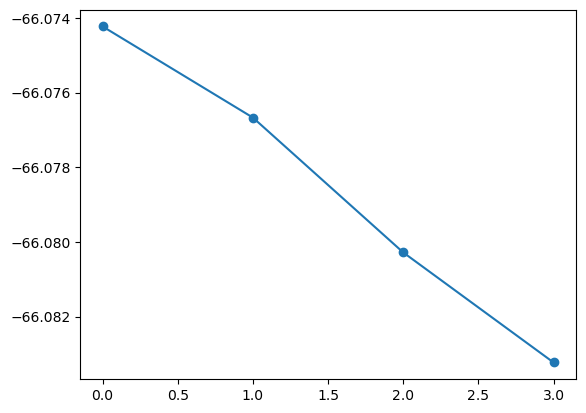

In [7]:
plt.plot(job.output.energy_tot, marker="o", label="Total energy")

### Create a grace job for relaxing the atomic positions and volume and shape of cell

In [30]:
job_relax = pr.create_job(job_type=Grace, job_name="Fe_relax_atoms_and_cell")
job_relax.structure = Fe

In [26]:
job_relax.calc_minimize?

Signature:
job_relax.calc_minimize(
    grace_model: Literal['GRACE-1L-MP-r6', 'GRACE-2L-MP-r5', 'GRACE-2L-MP-r6', 'GRACE-FS-OAM', 'GRACE-1L-OAM', 'GRACE-2L-OAM', 'GRACE-FS-OMAT', 'GRACE-1L-OMAT', 'GRACE-2L-OMAT'] = 'GRACE-2L-OMAT',
    algorithm: Literal['FIRE', 'BFGS', 'LBFGS'] = 'FIRE',
    algorithm_kwargs: dict = None,
    relax_cell: bool | None = False,
    relax_cell_kwargs: dict = None,
    ionic_force_tolerance: float = 0.1,
    max_iter: int = 500,
    n_print: int = 1,
    save_path: str | None = 'relax.traj',
)
Docstring:
Perform a structure relaxation (geometry optimization).

Parameters
----------
grace_model : str,
    The Grace model to use for the calculation. Default is "GRACE-2L-OMAT".
algorithm : str, optional
    Choose an ASE algorithm for the ionic relaxation. Default is "FIRE".
algorithm_kwargs: dict, optional
    Additional keyword arguments for the chosen algorithm. Default is None.
relax_cell : bool or None, optional
    Whether to allow relaxation of the si

In [27]:
job_relax.calc_minimize(relax_cell=True)
job_relax.run(delete_existing_job=True)

Trajectory name: relax.traj
The job Fe_relax_atoms_and_cell was saved and received the ID: 13
Index(['Step', 'Time', 'Energy', 'fmax'], dtype='object')
Printed energies: FIRE:   -66.074232
FIRE:   -65.863668
FIRE:   -66.133603
FIRE:   -65.962403
FIRE:   -66.017516
FIRE:   -66.093289
FIRE:   -66.137176
FIRE:   -66.113015
FIRE:   -66.115687
FIRE:   -66.120465
FIRE:   -66.126347
FIRE:   -66.132120
FIRE:   -66.136631
FIRE:   -66.139027
FIRE:   -66.139002
FIRE:   -66.139017
FIRE:   -66.139048
FIRE:   -66.139092
FIRE:   -66.139149
FIRE:   -66.139216
FIRE:   -66.139291
FIRE:   -66.139372
FIRE:   -66.139466
FIRE:   -66.139571
FIRE:   -66.139685
FIRE:   -66.139803
FIRE:   -66.139923
FIRE:   -66.140045
FIRE:   -66.140175
FIRE:   -66.140327
FIRE:   -66.140518
FIRE:   -66.140767
FIRE:   -66.141076
FIRE:   -66.141431
FIRE:   -66.141795
FIRE:   -66.142145
FIRE:   -66.142505
FIRE:   -66.142907
Name: Energy, dtype: float64
Parsing minimize calculation output        Step      Time     Energy      fmax


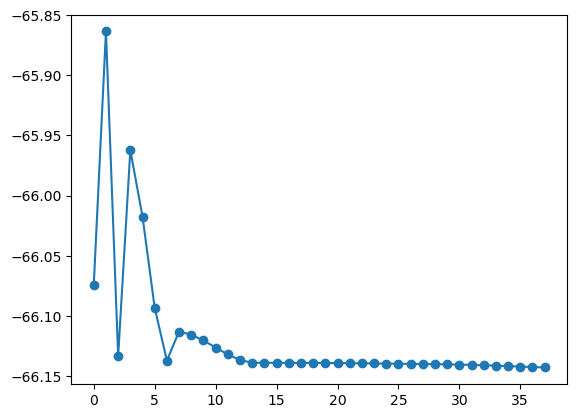

In [28]:
plt.plot(job_relax.output.energy_tot, marker="o", label="Total energy with cell relaxation")

In [34]:
job_relax.animate_structures()

NGLWidget(max_frame=37)

### Create a Grace job for relaxing the atomic positions and cell volume

In [36]:
job_volume = pr.create_job(job_type=Grace, job_name="Fe_relax_atoms_and_volume")
job_volume.structure = Fe

In [37]:
job_volume.calc_minimize?

Signature:
job_volume.calc_minimize(
    grace_model: Literal['GRACE-1L-MP-r6', 'GRACE-2L-MP-r5', 'GRACE-2L-MP-r6', 'GRACE-FS-OAM', 'GRACE-1L-OAM', 'GRACE-2L-OAM', 'GRACE-FS-OMAT', 'GRACE-1L-OMAT', 'GRACE-2L-OMAT'] = 'GRACE-2L-OMAT',
    algorithm: Literal['FIRE', 'BFGS', 'LBFGS'] = 'FIRE',
    algorithm_kwargs: dict = None,
    relax_cell: bool | None = False,
    relax_cell_kwargs: dict = None,
    ionic_force_tolerance: float = 0.1,
    max_iter: int = 500,
    n_print: int = 1,
    save_path: str | None = 'relax.traj',
)
Docstring:
Perform a structure relaxation (geometry optimization).

Parameters
----------
grace_model : str,
    The Grace model to use for the calculation. Default is "GRACE-2L-OMAT".
algorithm : str, optional
    Choose an ASE algorithm for the ionic relaxation. Default is "FIRE".
algorithm_kwargs: dict, optional
    Additional keyword arguments for the chosen algorithm. Default is None.
relax_cell : bool or None, optional
    Whether to allow relaxation of the s

This time we also use a different Grace UMLIP and algo:

In [39]:
job_volume.calc_minimize(grace_model='GRACE-2L-MP-r5', relax_cell=True, relax_cell_kwargs={"hydrostatic_strain": True})
job_volume.run(delete_existing_job=True)

Trajectory name: relax.traj
The job Fe_relax_atoms_and_volume was saved and received the ID: 14
Index(['Step', 'Time', 'Energy', 'fmax'], dtype='object')
Printed energies: FIRE:   -66.995027
FIRE:   -66.950263
FIRE:   -67.012562
FIRE:   -67.000903
FIRE:   -67.007194
FIRE:   -67.015855
FIRE:   -67.021336
FIRE:   -67.020113
FIRE:   -67.020261
FIRE:   -67.020532
FIRE:   -67.020884
FIRE:   -67.021260
FIRE:   -67.021600
FIRE:   -67.021854
FIRE:   -67.021990
Name: Energy, dtype: float64
Parsing minimize calculation output        Step      Time     Energy      fmax
FIRE:     0  20:36:38 -66.995027  2.116620
FIRE:     1  20:36:38 -66.950263  3.447075
FIRE:     2  20:36:38 -67.012562  1.247240
FIRE:     3  20:36:38 -67.000903  1.904355
FIRE:     4  20:36:39 -67.007194  1.595742
FIRE:     5  20:36:39 -67.015855  1.015204
FIRE:     6  20:36:39 -67.021336  0.250665
FIRE:     7  20:36:39 -67.020113  0.554276
FIRE:     8  20:36:40 -67.020261  0.530797
FIRE:     9  20:36:40 -67.020532  0.484816
FIRE:

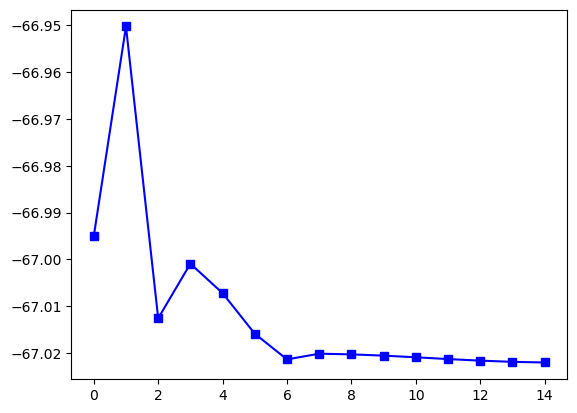

In [50]:
plt.plot(job_volume.output.energy_tot, color="b", marker="s", label="Total energy with volume relaxation")

### Relaxation of a large structure

In [ ]:
large_Fe = pr.create.structure.bulk("Fe").repeat([2, 2, 2])
job_relax = pr.create_job(job_type=Grace, job_name="large_Fe_relax")
copy_structure = large_Fe.copy()
copy_structure[0] = "Mo"
job_relax.structure = copy_structure
job_relax.calc_minimize(relax_cell=True, grace_model='GRACE-2L-OAM')
job_relax.run(delete_existing_job=True)

In [ ]:
# Relaxation of a large structure
large_Fe = pr.create.structure.bulk("Fe", cubic=True).repeat([2, 2, 2])
job_relax = pr.create_job(job_type=Grace, job_name="large_Fe_relax_omat")
copy_structure = large_Fe.copy()
copy_structure[0] = "Mo"
job_relax.structure = copy_structure
job_relax.calc_minimize(relax_cell=True, grace_model='GRACE-2L-OMAT', ionic_force_tolerance=1e-4)
job_relax.run(delete_existing_job=True)

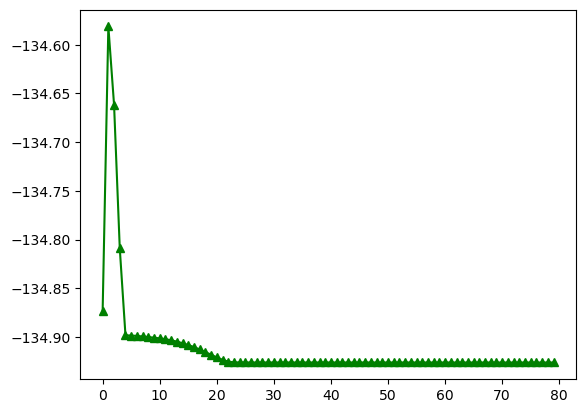

In [9]:
plt.plot(job_relax.output.energy_tot, color="g", marker="^", label="Total energy with cell relaxation and OMAT")

## Satic calculation

In [7]:
job_static = pr.create_job(job_type=Grace, job_name="Fe_static")
job_static.structure = Fe

job_static.calc_static?

Signature:
job_static.calc_static(
    grace_model: Literal['GRACE-1L-MP-r6', 'GRACE-2L-MP-r5', 'GRACE-2L-MP-r6', 'GRACE-FS-OAM', 'GRACE-1L-OAM', 'GRACE-2L-OAM', 'GRACE-FS-OMAT', 'GRACE-1L-OMAT', 'GRACE-2L-OMAT'] = 'GRACE-2L-OMAT',
)
Docstring:
Perform a static calculation.

Parameters
----------
grace_model : {"GRACE-1L-MP-r6", "GRACE-2L-MP-r5", "GRACE-2L-MP-r6", "GRACE-FS-OAM",
"GRACE-1L-OAM", "GRACE-2L-OAM", "GRACE-FS-OMAT", "GRACE-1L-OMAT", "GRACE-2L-OMAT"}, optional
    The Grace model to use for the calculation. Default is "GRACE-2L-OMAT".

This method sets up the Grace calculator with the specified model and prepares
the job for a static calculation. The structure must be set before calling this method.

Raises
------
ValueError
    If the structure is not set before calling this method.
File:      ~/projects/mul/wmaee/wmaee/codes/pyiron/pyiron_GRACE_job.py
Type:      method

In [8]:
job_static.calc_static(grace_model='GRACE-2L-MP-r5')
job_static.run(delete_existing_job=True)

Using cached GRACE model from /home/amin/.cache/grace/GRACE-2L-MP-r5
Model license: Academic Software License
The job Fe_static was saved and received the ID: 1
Index(['step', 'energy_pot', 'forces', 'stresses'], dtype='object')


/home/amin/projects/mul/wmaee/wmaee/codes/pyiron/pyiron_GRACE_job.py:478: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  header = pd.read_csv(
/home/amin/projects/mul/wmaee/wmaee/codes/pyiron/pyiron_GRACE_job.py:484: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_table(


In [9]:
job_static.output.energy_tot


array([-66.99502741])